In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import regularizers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras_tuner
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
print(tf.__version__)
print(keras.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.10.1
2.10.0
Num GPUs Available:  1


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### initializations 

In [ ]:
parameter =['random_normal','random_uniform','ones',"glorot_uniform"]
models_mlp ={}
models_cnn ={}
histories_mlp ={}
histories_cnn ={}


for i in range(len(parameter)):
    models_mlp["model_mlp_" + str(i)] = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation='relu',kernel_initializer=parameter[i]),
        keras.layers.Dense(100, activation='relu',kernel_initializer=parameter[i]),
        keras.layers.Dense(10, activation='softmax',kernel_initializer=parameter[i])
    ])

    models_mlp["model_mlp_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                    optimizer='sgd',
                    metrics=['accuracy'])

    histories_mlp["history_mlp_" + str(i)] = models_mlp["model_mlp_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

    models_cnn["model_cnn_" + str(i)] = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', 
                        input_shape=[28,28,1],kernel_initializer=parameter[i]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same',kernel_initializer=parameter[i]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same',kernel_initializer=parameter[i]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu',kernel_initializer=parameter[i]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu',kernel_initializer=parameter[i]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax',kernel_initializer=parameter[i])
    ])

    models_cnn["model_cnn_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    histories_cnn["history_cnn_" + str(i)] = models_cnn["model_cnn_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9460 - accuracy: 0.6820 - val_loss: 0.5940 - val_accuracy: 0.7900
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5474 - accuracy: 0.8094 - val_loss: 0.4764 - val_accuracy: 0.8450
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4820 - accuracy: 0.8309 - val_loss: 0.4478 - val_accuracy: 0.8508
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4486 - accuracy: 0.8414 - val_loss: 0.4515 - val_accuracy: 0.8424
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4267 - accuracy: 0.8496 - val_loss: 0.4138 - val_accuracy: 0.8532
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4089 - accuracy: 0.8558 - val_loss: 0.4309 - val_accuracy: 0.8490
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3933 - accuracy: 0.8620 - val_loss: 0.3993 - val_accuracy:

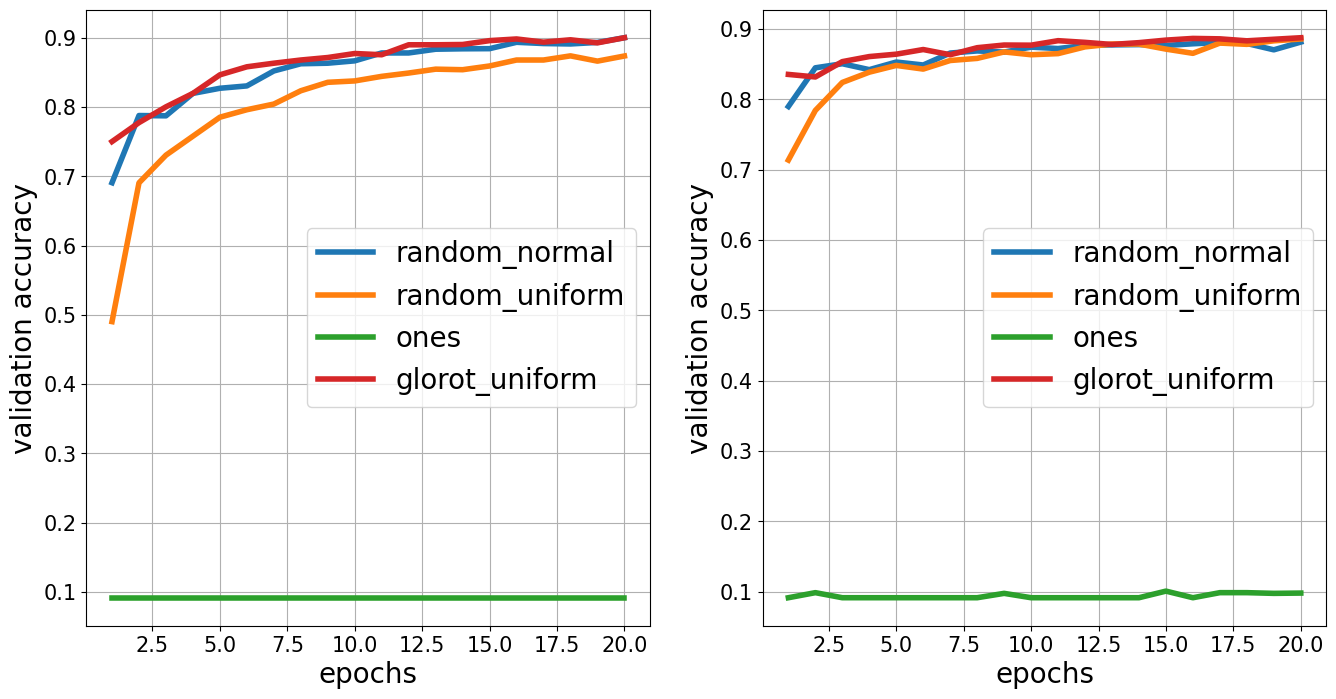

In [ ]:
epoch = 20
fig_0, ax_0 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
epochs = np.arange(1,epoch+1,1)
ax_0[0].set_xlabel('epochs', fontsize=20)
ax_0[0].set_ylabel('validation accuracy', fontsize=20)
ax_0[1].set_xlabel('epochs', fontsize=20)
ax_0[1].set_ylabel('validation accuracy', fontsize=20)
ax_0[0].tick_params(labelsize=15)
ax_0[1].tick_params(labelsize=15)
for i in range(len(parameter)):
    index = i
    val_accuracy_cnn = histories_cnn["history_cnn_"+str(index)].history['val_accuracy']
    val_accuracy_mlp = histories_mlp["history_mlp_"+str(index)].history['val_accuracy']
    ax_0[0].plot(epochs, val_accuracy_cnn, label=parameter[i], linewidth=4)
    ax_0[1].plot(epochs, val_accuracy_mlp, label=parameter[i], linewidth=4)
    ax_0[0].set_title("Initialization - CNN")
    ax_0[1].set_title("Initialization - MLP")
ax_0[0].legend(fontsize=20)
ax_0[1].legend(fontsize=20)
ax_0[0].grid()
ax_0[1].grid()  
#plt.savefig('hw2_task1')


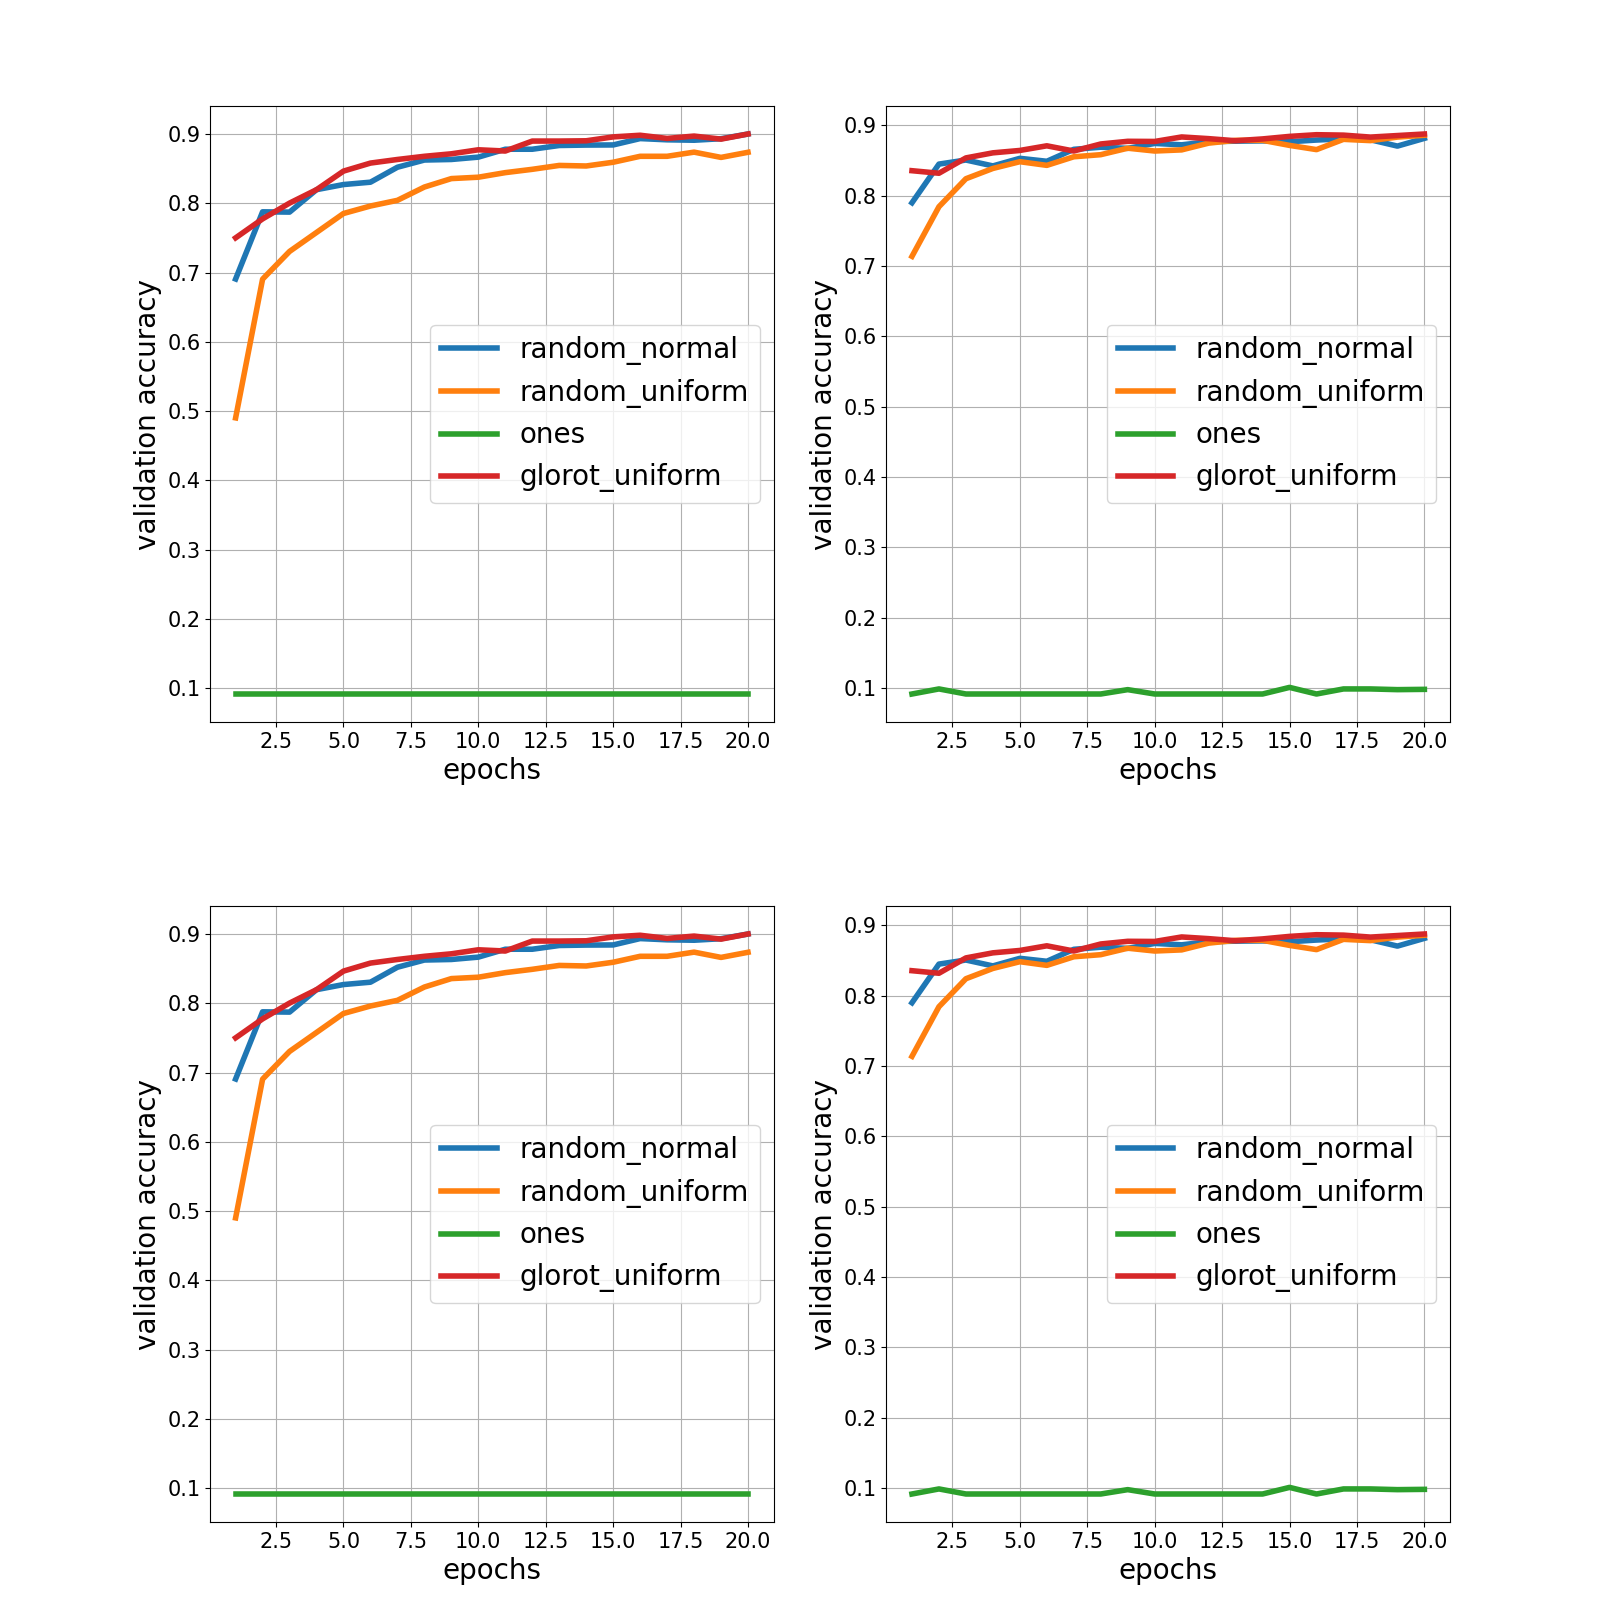

In [12]:
import matplotlib as mpl

backend = mpl.get_backend()
mpl.use('agg')

c1 = fig_0.canvas
c2 = fig_0.canvas

c1.draw()
c2.draw()

a1 = np.array(c1.buffer_rgba())
a2 = np.array(c2.buffer_rgba())
a = np.vstack((a1,a2))

mpl.use(backend)
fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(0,0,1,1)
ax.set_axis_off()
ax.matshow(a)

### activations

In [ ]:
parameter =['relu','tanh','softmax','softsign']
models_mlp ={}
models_cnn ={}
histories_mlp ={}
histories_cnn ={}


for i in range(len(parameter)):
    models_mlp["model_mlp_" + str(i)] = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation=parameter[i]),
        keras.layers.Dense(100, activation=parameter[i]),
        keras.layers.Dense(10, activation='softmax')
    ])

    models_mlp["model_mlp_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                    optimizer='sgd',
                    metrics=['accuracy'])

    histories_mlp["history_mlp_" + str(i)] = models_mlp["model_mlp_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

    models_cnn["model_cnn_" + str(i)] = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation=parameter[i], padding='same', 
                        input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation=parameter[i], padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation=parameter[i], padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=parameter[i]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=parameter[i]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    ])

    models_cnn["model_cnn_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    histories_cnn["history_cnn_" + str(i)] = models_cnn["model_cnn_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 2.3341 - accuracy: 0.1009 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 2/20
1719/1719 [==============================] - 4s 3ms/step - loss: 2.3025 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 3/20
1719/1719 [==============================] - 4s 3ms/step - loss: 2.3025 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3025 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 5/20
1719/1719 [==============================] - 4s 3ms/step - loss: 2.3025 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3025 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy: 0.0914
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 2.3025 - accuracy: 0.1008 - val_loss: 2.3026 - val_accuracy:

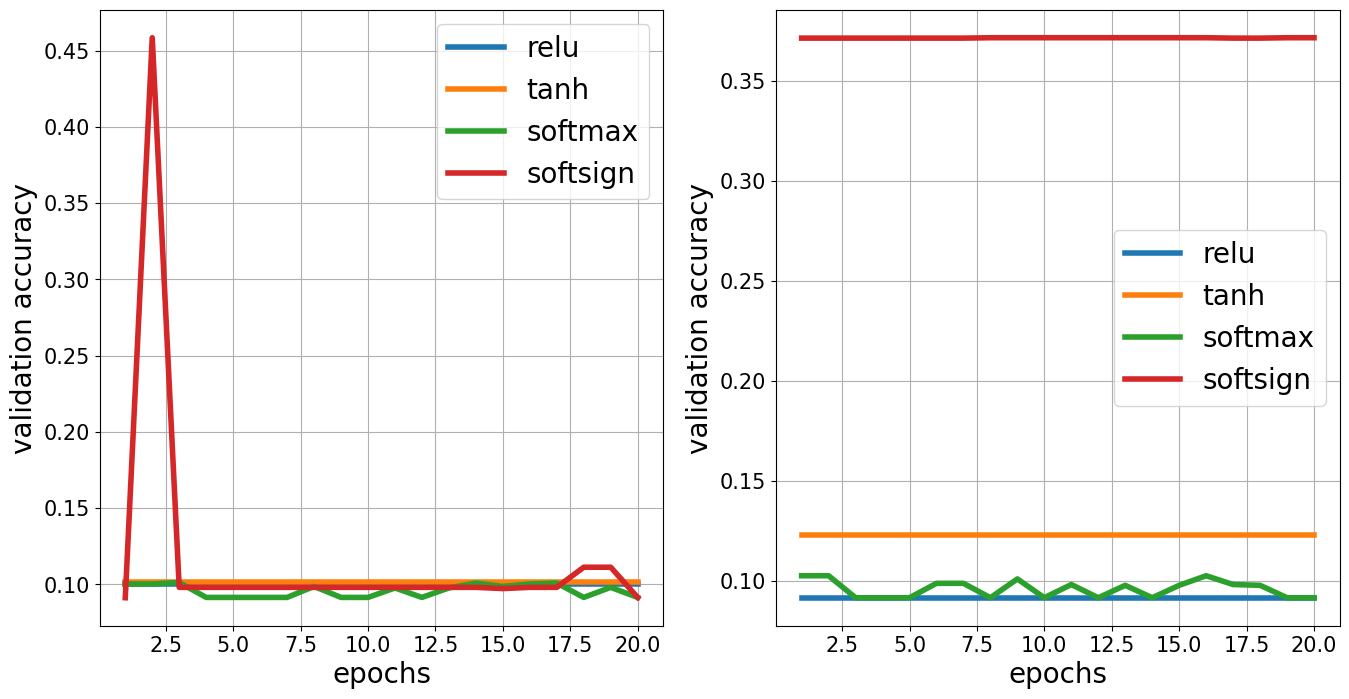

In [ ]:
epoch = 20
fig_1, ax_1 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
epochs = np.arange(1,epoch+1,1)
ax_1[0].set_xlabel('epochs', fontsize=20)
ax_1[0].set_ylabel('validation accuracy', fontsize=20)
ax_1[1].set_xlabel('epochs', fontsize=20)
ax_1[1].set_ylabel('validation accuracy', fontsize=20)
ax_1[0].tick_params(labelsize=15)
ax_1[1].tick_params(labelsize=15)
for i in range(len(parameter)):
    index = i
    val_accuracy_cnn = histories_cnn["history_cnn_"+str(index)].history['val_accuracy']
    val_accuracy_mlp = histories_mlp["history_mlp_"+str(index)].history['val_accuracy']
    ax_1[0].plot(epochs, val_accuracy_cnn, label=parameter[i], linewidth=4)
    ax_1[1].plot(epochs, val_accuracy_mlp, label=parameter[i], linewidth=4)
    ax_1[0].set_title("Activation - CNN")
    ax_1[1].set_title("Activation - MLP")
ax_1[0].legend(fontsize=20)
ax_1[1].legend(fontsize=20)
ax_1[0].grid()
ax_1[1].grid()  
#plt.savefig('hw2_task1')


### optimizers

In [ ]:
parameter =['SGD','RMSprop','Adam']
models_mlp ={}
models_cnn ={}
histories_mlp ={}
histories_cnn ={}


for i in range(len(parameter)):
    models_mlp["model_mlp_" + str(i)] = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])

    models_mlp["model_mlp_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                    optimizer=parameter[i],
                    metrics=['accuracy'])

    histories_mlp["history_mlp_" + str(i)] = models_mlp["model_mlp_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

    models_cnn["model_cnn_" + str(i)] = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', 
                        input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
    ])

    models_cnn["model_cnn_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                  optimizer=parameter[i],
                  metrics=['accuracy'])
    
    histories_cnn["history_cnn_" + str(i)] = models_cnn["model_cnn_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7173 - accuracy: 0.7638 - val_loss: 0.4940 - val_accuracy: 0.8340
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4829 - accuracy: 0.8325 - val_loss: 0.4435 - val_accuracy: 0.8494
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4376 - accuracy: 0.8464 - val_loss: 0.4207 - val_accuracy: 0.8540
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4087 - accuracy: 0.8568 - val_loss: 0.4223 - val_accuracy: 0.8528
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3904 - accuracy: 0.8625 - val_loss: 0.3756 - val_accuracy: 0.8686
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3729 - accuracy: 0.8699 - val_loss: 0.3724 - val_accuracy: 0.8716
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3601 - accuracy: 0.8726 - val_loss: 0.3653 - val_accuracy:

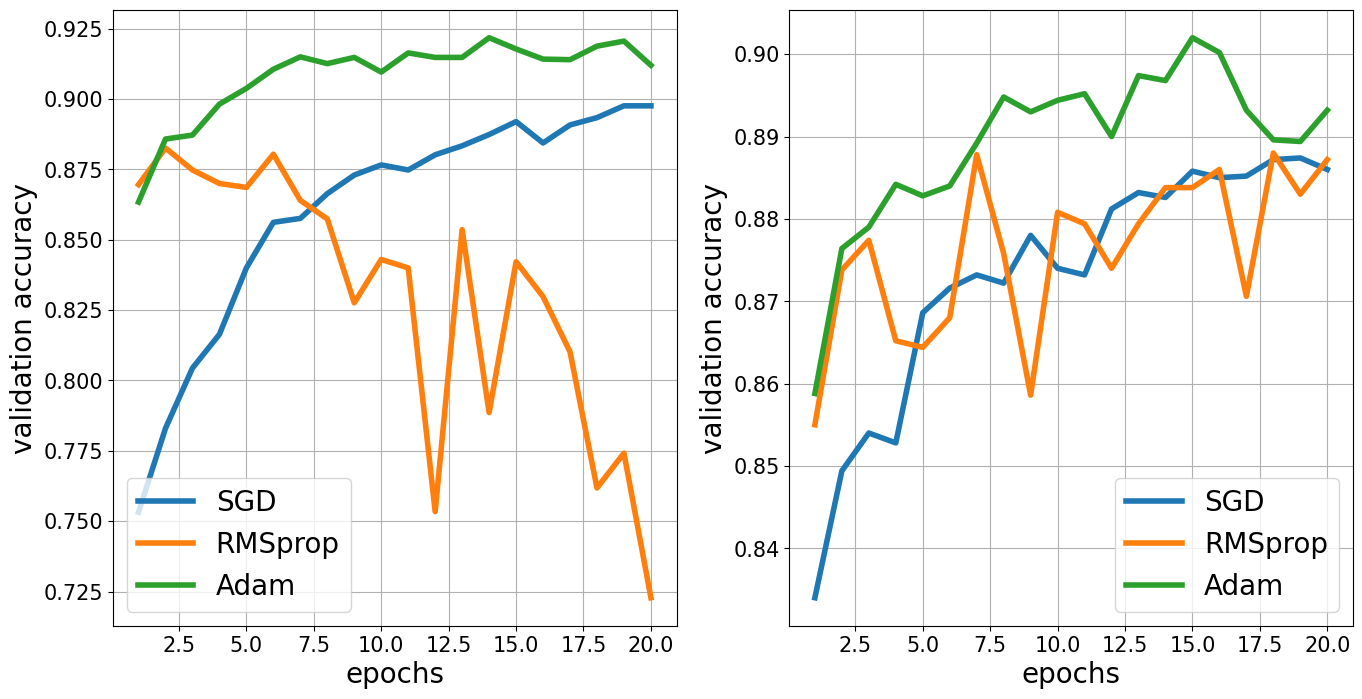

In [ ]:
epoch = 20
fig_2, ax_2 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
epochs = np.arange(1,epoch+1,1)
ax_2[0].set_xlabel('epochs', fontsize=20)
ax_2[0].set_ylabel('validation accuracy', fontsize=20)
ax_2[1].set_xlabel('epochs', fontsize=20)
ax_2[1].set_ylabel('validation accuracy', fontsize=20)
ax_2[0].tick_params(labelsize=15)
ax_2[1].tick_params(labelsize=15)
for i in range(len(parameter)):
    index = i
    val_accuracy_cnn = histories_cnn["history_cnn_"+str(index)].history['val_accuracy']
    val_accuracy_mlp = histories_mlp["history_mlp_"+str(index)].history['val_accuracy']
    ax_2[0].plot(epochs, val_accuracy_cnn, label=parameter[i], linewidth=4)
    ax_2[1].plot(epochs, val_accuracy_mlp, label=parameter[i], linewidth=4)
    ax_2[0].set_title("Optimizers - CNN")
    ax_2[1].set_title("Optimizers - MLP")
ax_2[0].legend(fontsize=20)
ax_2[1].legend(fontsize=20)
ax_2[0].grid()
ax_2[1].grid()  
#plt.savefig('hw2_task1')

### regularizations (L1, L2, Dropout, no Dropout).

In [ ]:
parameter =[None,'l1','l2','l1_l2']
models_mlp ={}
models_cnn ={}
histories_mlp ={}
histories_cnn ={}


for i in range(len(parameter)):
    models_mlp["model_mlp_" + str(i)] = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation='relu',kernel_regularizer =parameter[i],
        bias_regularizer=parameter[i],
        activity_regularizer=parameter[i]),
        keras.layers.Dense(100, activation='relu',kernel_regularizer =parameter[i],
        bias_regularizer=parameter[i],
        activity_regularizer=parameter[i]),
        keras.layers.Dense(10, activation='softmax',kernel_regularizer =parameter[i],
        bias_regularizer=parameter[i],
        activity_regularizer=parameter[i])
    ])

    models_mlp["model_mlp_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                    optimizer='sgd',
                    metrics=['accuracy'])

    histories_mlp["history_mlp_" + str(i)] = models_mlp["model_mlp_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

    models_cnn["model_cnn_" + str(i)] = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same',kernel_regularizer =parameter[i],
        bias_regularizer=parameter[i],
        activity_regularizer=parameter[i], 
                        input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same',kernel_regularizer =parameter[i],
    ),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same',kernel_regularizer =parameter[i],
    ),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu',kernel_regularizer =parameter[i],
    ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu',kernel_regularizer =parameter[i],
    ),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax',kernel_regularizer =parameter[i],
    )
    ])

    models_cnn["model_cnn_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    histories_cnn["history_cnn_" + str(i)] = models_cnn["model_cnn_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7228 - accuracy: 0.7632 - val_loss: 0.5031 - val_accuracy: 0.8326
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4875 - accuracy: 0.8325 - val_loss: 0.4457 - val_accuracy: 0.8504
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4405 - accuracy: 0.8456 - val_loss: 0.4253 - val_accuracy: 0.8550
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4145 - accuracy: 0.8555 - val_loss: 0.3985 - val_accuracy: 0.8638
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3950 - accuracy: 0.8612 - val_loss: 0.3798 - val_accuracy: 0.8718
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3787 - accuracy: 0.8678 - val_loss: 0.3731 - val_accuracy: 0.8726
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3664 - accuracy: 0.8711 - val_loss: 0.3616 - val_accuracy:

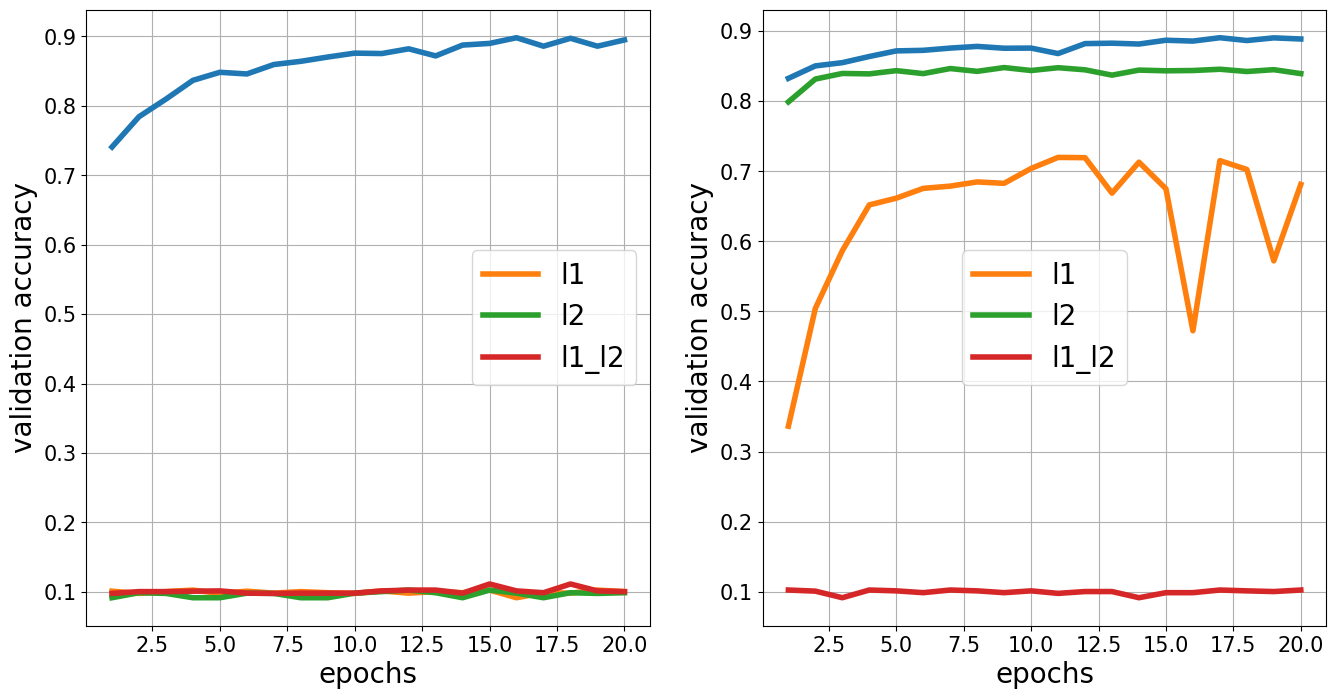

In [ ]:
epoch = 20
fig_3, ax_3 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
epochs = np.arange(1,epoch+1,1)
ax_3[0].set_xlabel('epochs', fontsize=20)
ax_3[0].set_ylabel('validation accuracy', fontsize=20)
ax_3[1].set_xlabel('epochs', fontsize=20)
ax_3[1].set_ylabel('validation accuracy', fontsize=20)
ax_3[0].tick_params(labelsize=15)
ax_3[1].tick_params(labelsize=15)
for i in range(len(parameter)):
    index = i
    val_accuracy_cnn = histories_cnn["history_cnn_"+str(index)].history['val_accuracy']
    val_accuracy_mlp = histories_mlp["history_mlp_"+str(index)].history['val_accuracy']
    ax_3[0].plot(epochs, val_accuracy_cnn, label=parameter[i], linewidth=4)
    ax_3[1].plot(epochs, val_accuracy_mlp, label=parameter[i], linewidth=4)
    ax_3[0].set_title("Regulizers - CNN")
    ax_3[1].set_title("Regulizers - MLP")
ax_3[0].legend(fontsize=20)
ax_3[1].legend(fontsize=20)
ax_3[0].grid()
ax_3[1].grid()  
#plt.savefig('hw2_task1')

In [26]:
parameter =[0,0.25,0.5,0.75]
models_mlp ={}
models_cnn ={}
histories_mlp ={}
histories_cnn ={}


for i in range(len(parameter)):
    models_mlp["model_mlp_" + str(i)] = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28,28]),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dropout(parameter[i]),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dropout(parameter[i]),
        keras.layers.Dense(10, activation='softmax')
    ])

    models_mlp["model_mlp_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                    optimizer='Adam',
                    metrics=['accuracy'])

    histories_mlp["history_mlp_" + str(i)] = models_mlp["model_mlp_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

    models_cnn["model_cnn_" + str(i)] = keras.models.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', 
                        input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(128, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Conv2D(256, 3, activation='relu', padding='same'),
    keras.layers.MaxPooling2D(2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(parameter[i]),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(parameter[i]),
    keras.layers.Dense(10, activation='softmax')
    ])

    models_cnn["model_cnn_" + str(i)].compile(loss='sparse_categorical_crossentropy', 
                  optimizer='Adam',
                  metrics=['accuracy'])
    
    histories_cnn["history_cnn_" + str(i)] = models_cnn["model_cnn_" + str(i)].fit(X_train, y_train, epochs=20, 
                        validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4902 - accuracy: 0.8223 - val_loss: 0.3677 - val_accuracy: 0.8642
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3651 - accuracy: 0.8664 - val_loss: 0.3451 - val_accuracy: 0.8724
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3268 - accuracy: 0.8792 - val_loss: 0.3699 - val_accuracy: 0.8666
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3057 - accuracy: 0.8852 - val_loss: 0.3205 - val_accuracy: 0.8852
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2863 - accuracy: 0.8935 - val_loss: 0.3018 - val_accuracy: 0.8946
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2698 - accuracy: 0.8988 - val_loss: 0.3101 - val_accuracy: 0.8886
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2615 - accuracy: 0.9019 - val_loss: 0.3064 - val_accuracy:

In [ ]:
epoch = 20
fig_4, ax_4 = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
epochs = np.arange(1,epoch+1,1)
ax_4[0].set_xlabel('epochs', fontsize=20)
ax_4[0].set_ylabel('validation accuracy', fontsize=20)
ax_4[1].set_xlabel('epochs', fontsize=20)
ax_4[1].set_ylabel('validation accuracy', fontsize=20)
ax_4[0].tick_params(labelsize=15)
ax_4[1].tick_params(labelsize=15)
for i in range(len(parameter)):
    index = i
    val_accuracy_cnn = histories_cnn["history_cnn_"+str(index)].history['val_accuracy']
    val_accuracy_mlp = histories_mlp["history_mlp_"+str(index)].history['val_accuracy']
    ax_4[0].plot(epochs, val_accuracy_cnn, label=parameter[i], linewidth=4)
    ax_4[1].plot(epochs, val_accuracy_mlp, label=parameter[i], linewidth=4)
    ax_4[0].set_title("Dropout - CNN")
    ax_4[1].set_title("Dropout - MLP")
ax_4[0].legend(fontsize=20)
ax_4[1].legend(fontsize=20)
ax_4[0].grid()
ax_4[1].grid()  
#plt.savefig('hw2_task1')

In [ ]:
import matplotlib as mpl

backend = mpl.get_backend()
mpl.use('agg')

c1 = fig_0.canvas
c2 = fig_0.canvas

c1.draw()
c2.draw()

a1 = np.array(c1.buffer_rgba())
a2 = np.array(c2.buffer_rgba())
a = np.vstack((a1,a2))

mpl.use(backend)
fig, ax = plt.subplots(figsize=(16, 16))
fig.subplots_adjust(0,0,1,1)
ax.set_axis_off()
ax.matshow(a)